# skleanでdatasetを取得する。

In [94]:
 from sklearn import datasets

load_xxx()でデータセットをロードできる。  
http://scikit-learn.org/stable/datasets/index.html  
load_boston()  
load_iris()  
load_diabetes()  
load_digits()  
load_linnerud()  
load_wine()  
load_breast_cancer()  

In [145]:
wine = datasets.load_wine()

In [96]:
dataset = wine

In [97]:
print(dataset.DESCR)

Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash: 

In [98]:
x = dataset.data
y = dataset.target

# pandasのデータフレームに変換、seaboarnで可視化してデータを眺める。

In [99]:
import pandas as pd
x_df= pd.DataFrame(x, columns=dataset.feature_names)

In [100]:
y_df = pd.DataFrame(y, columns=['Target'])

In [101]:
concat = pd.concat([x_df, y_df], axis=1)

In [102]:
concat.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## pairplot

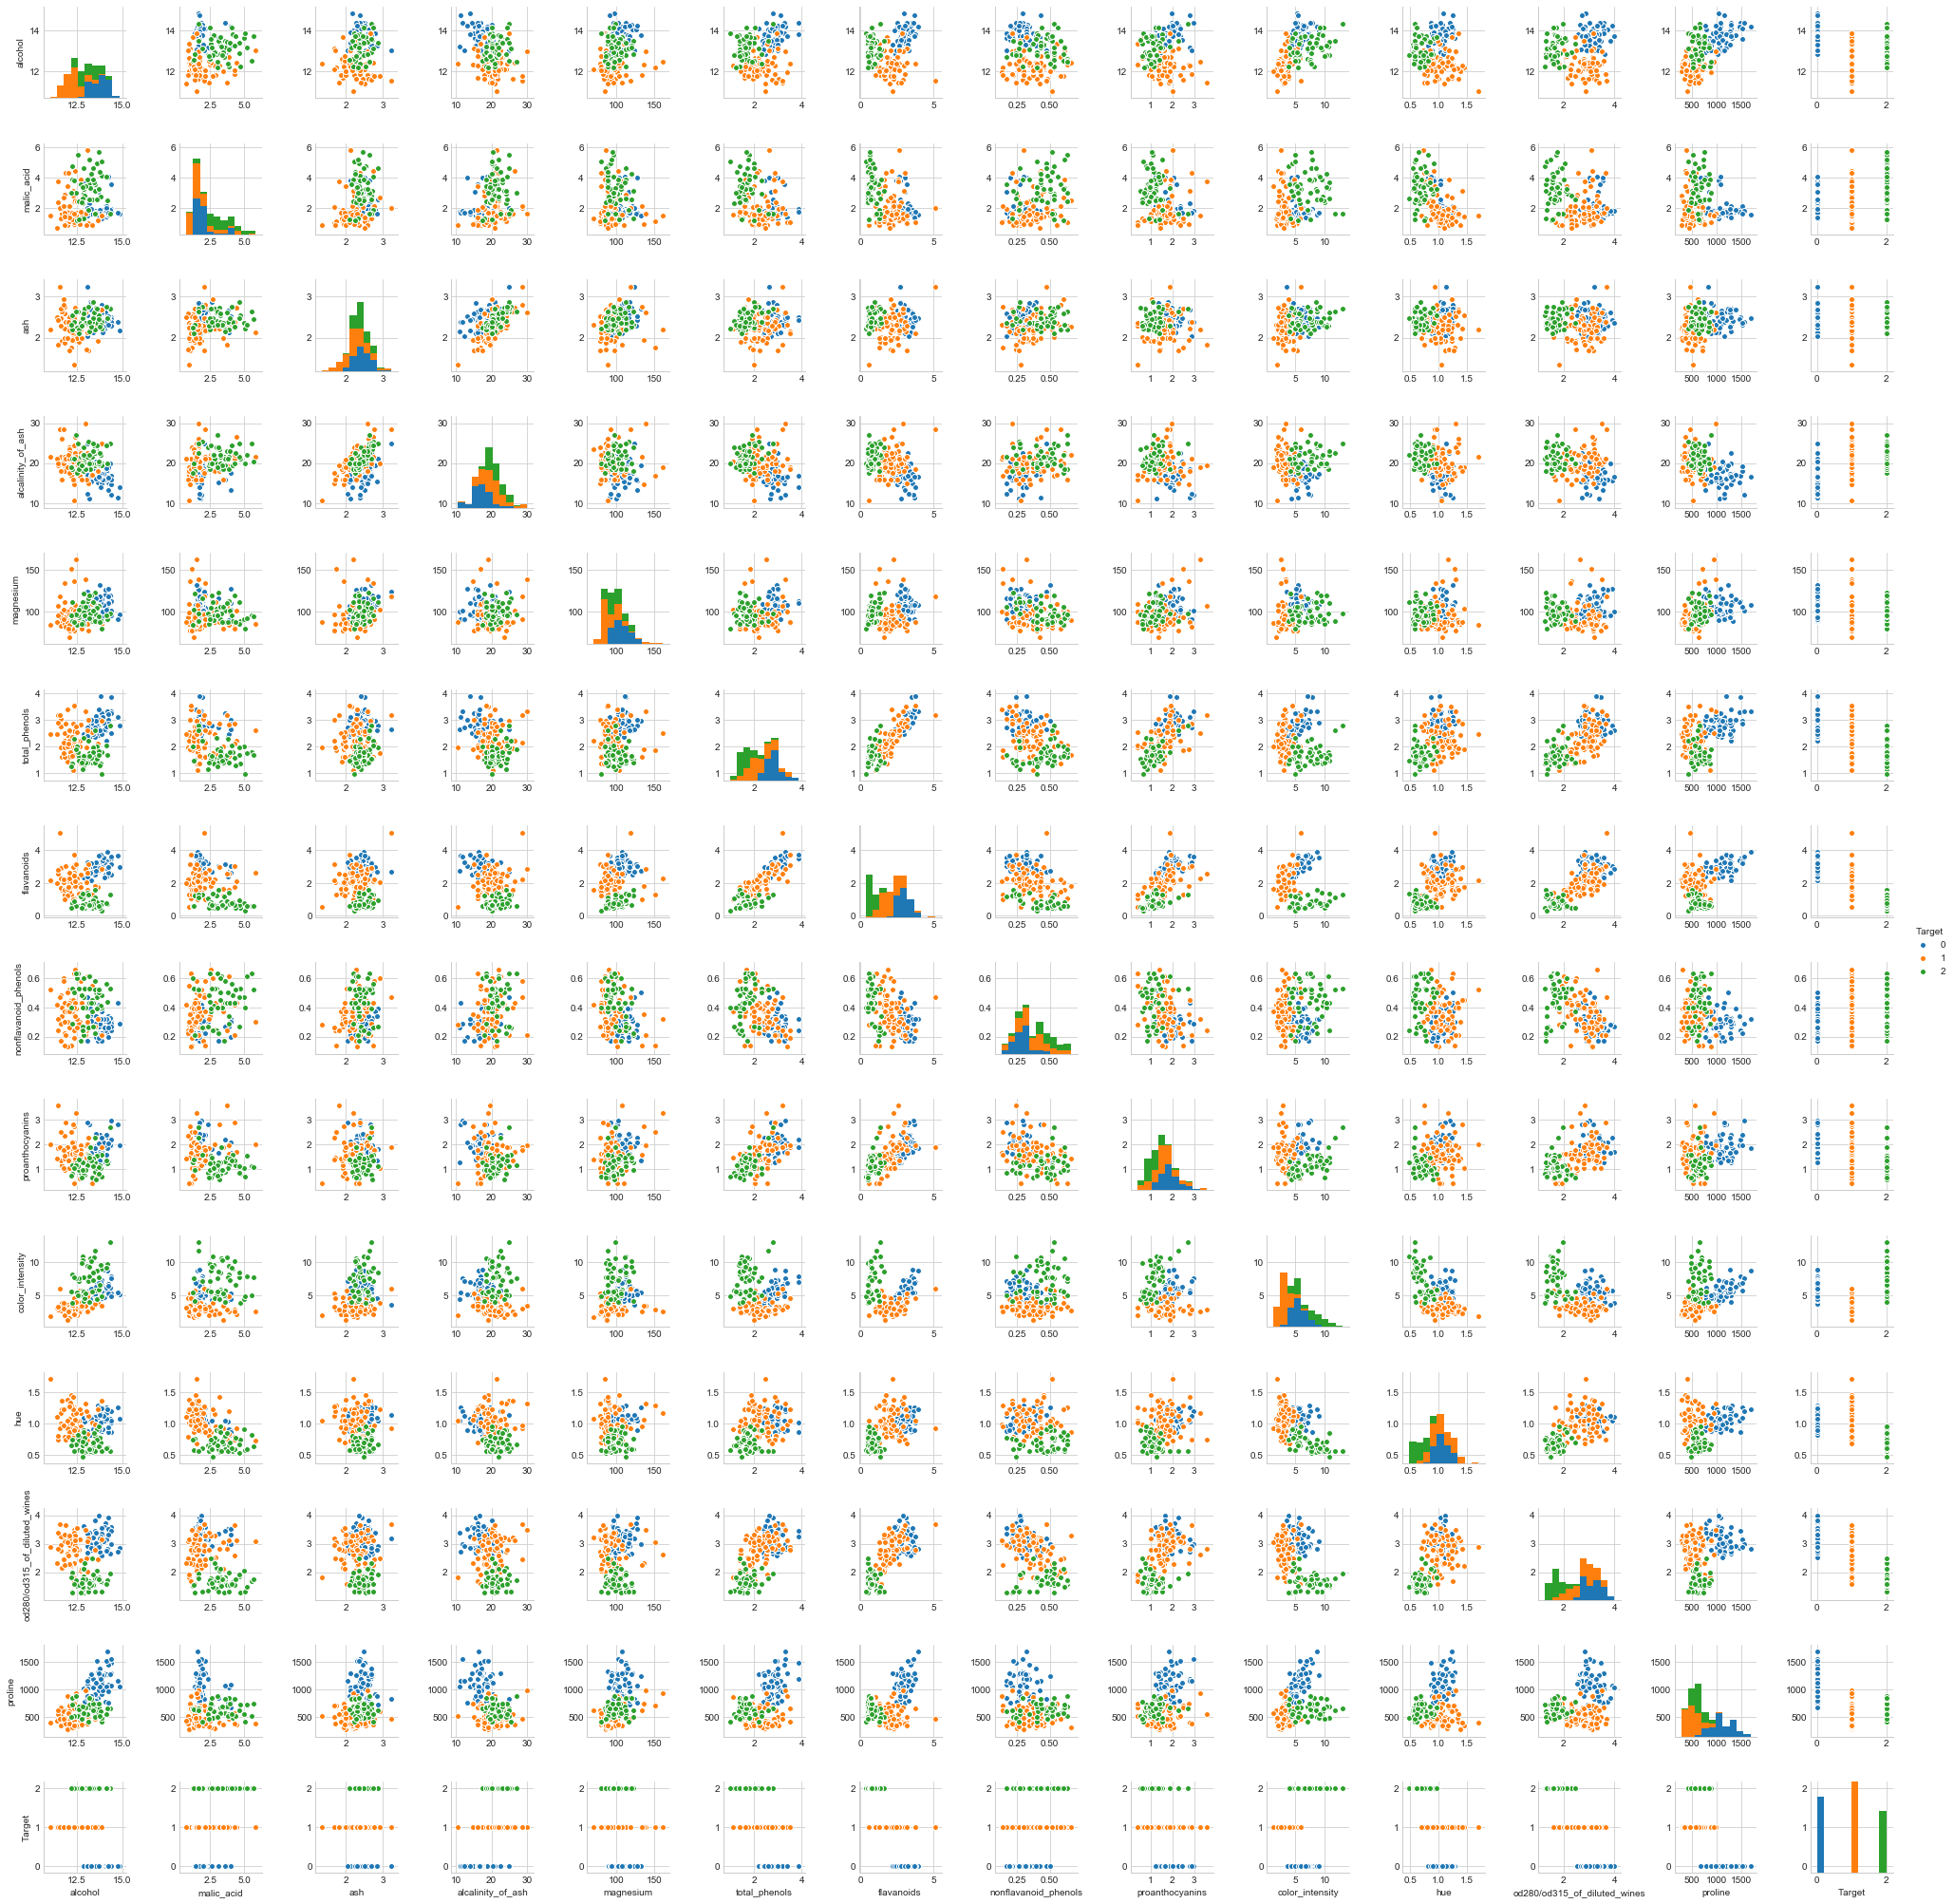

In [103]:
sns.pairplot(concat, hue='Target', size=2)

In [104]:
concat.groupby('Target').mean()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
Target,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


## countplot

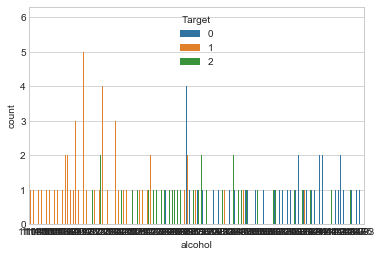

In [144]:
sns.countplot('alcohol',data=concat.sort_values('alcohol'), hue='Target')

## ヒストグラム

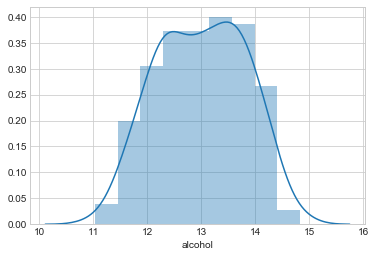

In [133]:
sns.distplot(concat['alcohol'])

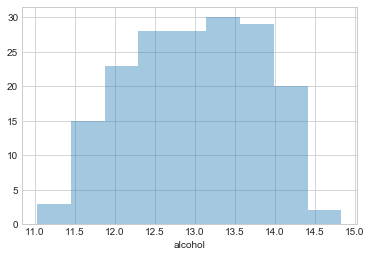

In [148]:
sns.distplot(concat['alcohol'], kde=False)

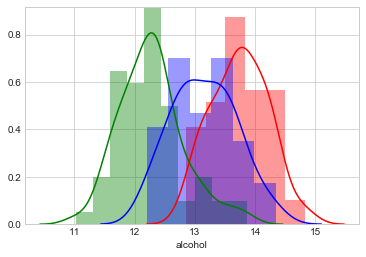

In [143]:
sns.distplot(concat[concat['Target']== 0].alcohol, color='r')
sns.distplot(concat[concat['Target']== 1].alcohol, color='g')
sns.distplot(concat[concat['Target']== 2].alcohol, color='b')

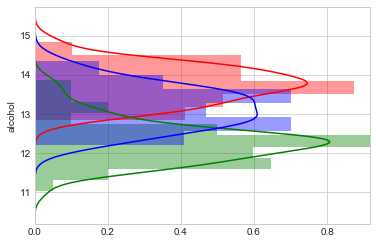

In [146]:
sns.distplot(concat[concat['Target']== 0].alcohol, color='r', vertical=True)
sns.distplot(concat[concat['Target']== 1].alcohol, color='g', vertical=True)
sns.distplot(concat[concat['Target']== 2].alcohol, color='b', vertical=True)

## 散布図

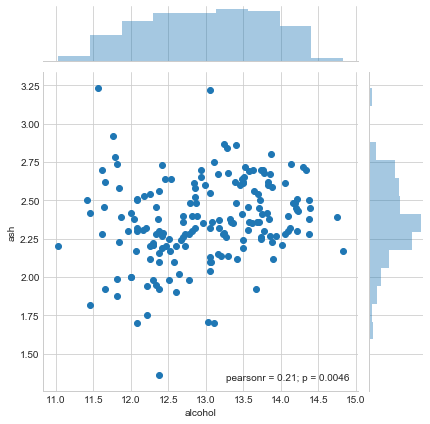

In [205]:
sns.jointplot('alcohol', 'ash', data=concat)



## barplot

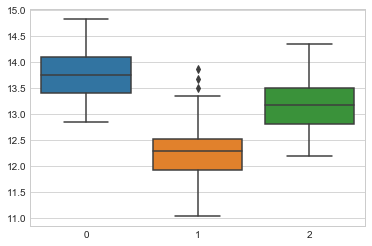

In [153]:
sns.boxplot(data=[ concat[concat['Target']== 0].alcohol, concat[concat['Target']== 1].alcohol, concat[concat['Target']== 2].alcohol ])

## violinplot

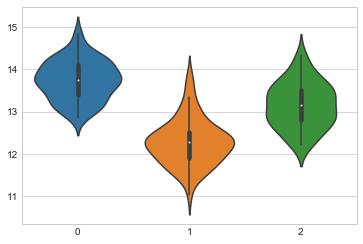

In [155]:
sns.violinplot(data=[ concat[concat['Target']== 0].alcohol, concat[concat['Target']== 1].alcohol, concat[concat['Target']== 2].alcohol ])

# ロジスティック回帰

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [185]:
X_train, X_test, Y_train, Y_test = train_test_split(x_df, y)

In [186]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [207]:
predict = model.predict(X_test)
metrics.accuracy_score(Y_test, predict)

0.97777777777777775

In [212]:
metrics.confusion_matrix(Y_test, predict)

array([[13,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 12]], dtype=int64)

# SVM

In [188]:
from sklearn.svm import SVC

In [189]:
model = SVC()
model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [190]:
predict = model.predict(X_test)
metrics.accuracy_score(Y_test, predict)

0.48888888888888887

# K近傍法

In [191]:
from sklearn.neighbors import KNeighborsClassifier

In [196]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
predict = model.predict(X_test)
metrics.accuracy_score(Y_test, predict)

0.71111111111111114

# ランダムフォレスト

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [202]:
model = RandomForestClassifier(n_estimators=50,random_state=0)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [204]:
predict = model.predict(X_test)
metrics.accuracy_score(Y_test, predict)

0.97777777777777775